In [1]:
# Task 6 
# Fast Fourier transform algorithm for image compression.
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

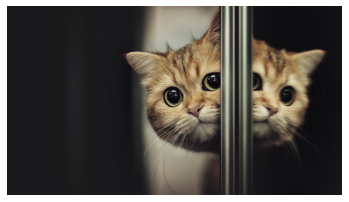

In [2]:

A = imread(os.path.join('Cotik.jpg'))
B = np.mean(A, -1);

plt.figure()
plt.imshow(A)
plt.axis('off')
plt.show()

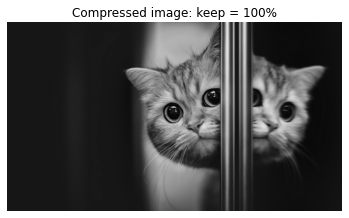

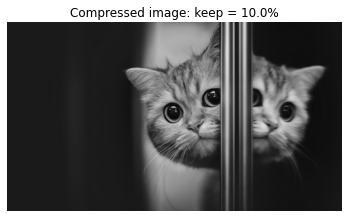

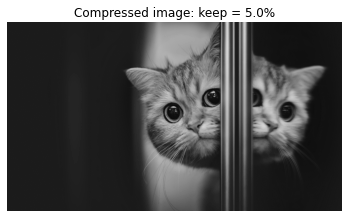

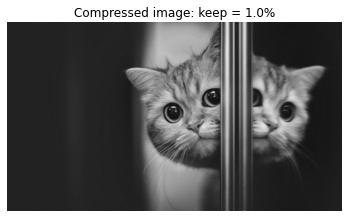

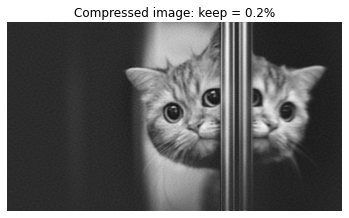

In [3]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (1,0.1,0.05,0.01,0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh             # Find small indices
    Atlow = Bt * ind                    # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real     # Compressed image
    plt.figure()
    plt.imshow(Alow, cmap = 'gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100) + '%')